In [ ]:
%pip install torchview
%pip install tensorflow
%pip install tensorrt


In [5]:


import tensorflow as tf
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Load the TensorBoard notebook extension
# !pip install notebook
# !pip install jupyter-tensorboard
from torch.utils.tensorboard import SummaryWriter

import tensorrt
import datetime, os
from tensorflow.keras.callbacks import TensorBoard
%load_ext tensorboard





# set device



cuda


In [2]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import f1_score

In [3]:
from sklearn.preprocessing import StandardScaler 

In [4]:
subjectList = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32']
data_all = []
labels_all = []
data_scaled = []
ss = StandardScaler()
for subjects in subjectList:
    with open('C:/Users/wongs/OneDrive/Documents/dissertation/DEAP/raw_s' + subjects + '.npy', 'rb') as file:
        sub = np.load(file, allow_pickle=True)
        data = [item[0] for item in sub]
        labels = [item[1] for item in sub]
        data_all.extend(data)
        labels_all.extend(labels)

data = np.array(data_all)
print(data.shape)


for i in range(data.shape[0]):
    data_i = data[i].T
    data_i = ss.fit_transform(data_i)
    data_scaled.append(data_i)
data_scaled = np.array(data_scaled)
labels = np.array(labels_all)
print(data_scaled.shape,labels.shape)


torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic=True
torch.backends.cudnn.benchmark=False

NameError: name 'np' is not defined

In [6]:
subjectList = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32']
data_all_ica = []
labels_all_ica = []
data_scaled_ica = []
ss = StandardScaler()
for subjects in subjectList:
    with open('C:/Users/wongs/OneDrive/Documents/dissertation/DEAP/raw_ica_s' + subjects + '.npy', 'rb') as file:
        sub_ica = np.load(file, allow_pickle=True)
        data_ica = [item[0] for item in sub_ica]
        labels_ica = [item[1] for item in sub_ica]
        data_all_ica.extend(data_ica)
        labels_all_ica.extend(labels_ica)

data_ica = np.array(data_all_ica)
print(data_ica.shape)


for i in range(data_ica.shape[0]):
    data_ica_i = data_ica[i].T
    data_ica_i = ss.fit_transform(data_ica_i)
    data_scaled_ica.append(data_ica_i)
data_scaled_ica = np.array(data_scaled_ica)
labels_ica = np.array(labels_all_ica)
print(data_scaled_ica.shape,labels_ica.shape)


(78080, 32, 256)
(78080, 256, 32) (78080, 4)


In [7]:
data_scaled_ica = data_scaled_ica.astype(np.float32)

In [12]:
Arousal = np.ravel(labels[:, [0]])
Valence = np.ravel(labels[:, [1]])
Domain = np.ravel(labels[:, [2]])
Like = np.ravel(labels[:, [3]])


Arousal_binary = np.where(Arousal >= 5, 1, 0)

Valence_binary = np.where(Valence >= 5, 1, 0)

Domain_binary = np.where(Domain >= 5, 1, 0)

X_train_aro, X_test_aro ,y_train_aro, y_test_aro = train_test_split(data_scaled, Arousal_binary, test_size=0.2, random_state=123)
X_train_val, X_test_val ,y_train_val, y_test_val = train_test_split(data_scaled, Valence_binary, test_size=0.2, random_state=123)
X_train_dom, X_test_dom ,y_train_dom, y_test_dom = train_test_split(data_scaled, Domain_binary, test_size=0.2, random_state=123)

train_set_aro = TensorDataset(torch.from_numpy(X_train_aro).float(), torch.from_numpy(y_train_aro).float())
train_set_val = TensorDataset(torch.from_numpy(X_train_val).float(), torch.from_numpy(y_train_val).float())
train_set_dom = TensorDataset(torch.from_numpy(X_train_dom).float(), torch.from_numpy(y_train_dom).float())

train_loader_aro = DataLoader(train_set_aro, batch_size=64, shuffle=True)
train_loader_val = DataLoader(train_set_val, batch_size=64, shuffle=True)
train_loader_dom = DataLoader(train_set_dom, batch_size=64, shuffle=True)

test_set_aro = TensorDataset(torch.from_numpy(X_test_aro).float(), torch.from_numpy(y_test_aro).float())
test_set_val = TensorDataset(torch.from_numpy(X_test_val).float(), torch.from_numpy(y_test_val).float())
test_set_dom = TensorDataset(torch.from_numpy(X_test_dom).float(), torch.from_numpy(y_test_dom).float())

test_loader_aro = DataLoader(test_set_aro, batch_size=64, shuffle=True)
test_loader_val = DataLoader(test_set_val, batch_size=64, shuffle=True)
test_loader_dom = DataLoader(test_set_dom, batch_size=64, shuffle=True)



In [9]:
Arousal_ica = np.ravel(labels_ica[:, [0]])
Valence_ica = np.ravel(labels_ica[:, [1]])
Domain_ica = np.ravel(labels_ica[:, [2]])
Like_ica = np.ravel(labels_ica[:, [3]])


Arousal_binary_ica = np.where(Arousal_ica >= 5, 1, 0)

Valence_binary_ica = np.where(Valence_ica >= 5, 1, 0)

Domain_binary_ica = np.where(Domain_ica >= 5, 1, 0)

X_train_ica_aro, X_test_ica_aro ,y_train_ica_aro, y_test_ica_aro = train_test_split(data_scaled_ica, Arousal_binary_ica, test_size=0.2, random_state=123)
X_train_ica_val, X_test_ica_val ,y_train_ica_val, y_test_ica_val = train_test_split(data_scaled_ica, Valence_binary_ica, test_size=0.2, random_state=123)
X_train_ica_dom, X_test_ica_dom ,y_train_ica_dom, y_test_ica_dom = train_test_split(data_scaled_ica, Domain_binary_ica, test_size=0.2, random_state=123)

train_set_ica_aro = TensorDataset(torch.from_numpy(X_train_ica_aro).float(), torch.from_numpy(y_train_ica_aro).float())
train_set_ica_val = TensorDataset(torch.from_numpy(X_train_ica_val).float(), torch.from_numpy(y_train_ica_val).float())
train_set_ica_dom = TensorDataset(torch.from_numpy(X_train_ica_dom).float(), torch.from_numpy(y_train_ica_dom).float())

train_loader_ica_aro = DataLoader(train_set_ica_aro, batch_size=64, shuffle=True)
train_loader_ica_val = DataLoader(train_set_ica_val, batch_size=64, shuffle=True)
train_loader_ica_dom = DataLoader(train_set_ica_dom, batch_size=64, shuffle=True)

test_set_ica_aro = TensorDataset(torch.from_numpy(X_test_ica_aro).float(), torch.from_numpy(y_test_ica_aro).float())
test_set_ica_val = TensorDataset(torch.from_numpy(X_test_ica_val).float(), torch.from_numpy(y_test_ica_val).float())
test_set_ica_dom = TensorDataset(torch.from_numpy(X_test_ica_dom).float(), torch.from_numpy(y_test_ica_dom).float())

test_loader_ica_aro = DataLoader(test_set_ica_aro, batch_size=64, shuffle=True)
test_loader_ica_val = DataLoader(test_set_ica_val, batch_size=64, shuffle=True)
test_loader_ica_dom = DataLoader(test_set_ica_dom, batch_size=64, shuffle=True)


In [10]:


def evaluation(loader, model, device):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()  # Binarize output for binary classification
            correct += (predicted == labels.unsqueeze(1)).sum().item()
            total += labels.size(0)
            
            # Accumulate all labels and predictions
            all_labels.append(labels.cpu())
            all_predictions.append(predicted.cpu())
    
    # Concatenate all accumulated batches
    all_labels = torch.cat(all_labels)
    all_predictions = torch.cat(all_predictions)
    
    # Calculate F1 score for the entire dataset
    f1 = f1_score(all_labels, all_predictions)
    
    accuracy = correct / total
    
    return accuracy, f1


In [11]:
def train_net(net, train_loader, test_loader, num_epochs, device):
    loss_epoch_array = []
    train_accuracy_list = []
    test_accuracy_list = []
    train_f1_list = []
    test_f1_list = []
    
    criterion = nn.BCELoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01, weight_decay=1e-4, momentum=0.75)
    
    net.to(device)

    for epoch in range(num_epochs):
        loss_epoch = 0.0
        net.train()
        
        for inputs, labels in train_loader:
            if torch.isnan(inputs).any() or torch.isnan(labels).any():
                print(f"NaN detected in batch, skipping...")
                continue  # Skip this batch
            
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Zero the gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = net(inputs)
            
            # Compute the loss
            loss = criterion(outputs, labels.unsqueeze(1).float())  # Ensure labels have the correct shape
            
            # Backward pass and optimization
            loss.backward()
            
            optimizer.step()
        
            loss_epoch += loss.item() / len(train_loader)
    
        loss_epoch_array.append(loss_epoch)
        
        # Evaluate accuracy and F1 score
        train_accuracy, f1_train = evaluation(train_loader, net, device)
        train_accuracy_list.append(train_accuracy)
        train_f1_list.append(f1_train)
        
        test_accuracy, f1_test = evaluation(test_loader, net, device)
        test_accuracy_list.append(test_accuracy)
        test_f1_list.append(f1_test)
        
        print(f"Epoch {epoch + 1}: loss: {loss_epoch:.4f}, "
              f"train accuracy: {train_accuracy:.4f}, train F1: {f1_train:.4f}, "
              f"valid accuracy: {test_accuracy:.4f}, valid F1: {f1_test:.4f}")

    # Plot the loss, accuracy, and F1 score
    plt.figure(figsize=(15, 5))
    
    # Loss plot
    plt.subplot(1, 3, 1)
    plt.plot(loss_epoch_array)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')

    # Accuracy plot
    plt.subplot(1, 3, 2)
    plt.plot(train_accuracy_list, label='Train')
    plt.plot(test_accuracy_list, label='Test')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Test Accuracy')
    plt.legend()
    
    # F1 Score plot
    plt.subplot(1, 3, 3)
    plt.plot(train_f1_list, label='Train F1')
    plt.plot(test_f1_list, label='Test F1')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.title('Training and Test F1 Score')
    plt.legend()

    return loss_epoch_array, train_accuracy_list, test_accuracy_list, train_f1_list, test_f1_list


In [12]:
device = torch.device('cuda')
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            m.bias.data.fill_(0.01)
    if isinstance(m, nn.Conv1d):
        torch.nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            m.bias.data.fill_(0.01)
            
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.RNN_model = nn.RNN(input_size=32, hidden_size=64, num_layers=2, batch_first=True,dropout=0.2)
        self.fc_model = nn.Sequential(
            nn.Linear(64, 1),
            nn.Sigmoid()# Single output for binary classification
        # Sigmoid activation for binary classification
        )
        
        

    def forward(self, x):
        rnn_out, hidden = self.RNN_model(x)  # rnn_out shape: (batch_size, sequence_length, hidden_size)
        last_output = rnn_out[:, -1, :]  # Get the last output for each sequence
        output = self.fc_model(last_output) 
       
        # Pass through fully connected layer
        return output



In [ ]:
model = RNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_aro, test_loader_aro, 200,device)



In [ ]:
model = RNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_val, test_loader_val, 200,device)


In [ ]:
model = RNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_dom, test_loader_dom, 200,device)


In [ ]:
model = RNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_ica_aro, test_loader_ica_aro, 200,device)


In [ ]:
model = RNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_ica_val, test_loader_ica_val, 200,device)

In [ ]:
model = RNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_ica_dom, test_loader_ica_dom, 200,device)

In [9]:
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm_model = nn.LSTM(input_size=32, hidden_size=64, num_layers=2, batch_first=True,dropout=0.4)
        self.fc_model = nn.Sequential(
            nn.Linear(64, 1),  # Single output for binary classification
            nn.Sigmoid()  # Sigmoid activation for binary classification
        )
        

    def forward(self, x):
        rnn_out, hidden = self.lstm_model(x)  # rnn_out shape: (batch_size, sequence_length, hidden_size)
        last_output = rnn_out[:, -1, :]  # Get the last output for each sequence
        output = self.fc_model(last_output)  # Pass through fully connected layer
        
        return output

In [ ]:
model = LSTM()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_aro, test_loader_aro, 200,device)

In [ ]:
model = LSTM()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_val, test_loader_val, 200,device)

In [ ]:
model = LSTM()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_dom, test_loader_dom, 200,device)

In [10]:
model = LSTM()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_ica_aro, test_loader_ica_aro, 200,device)

Epoch 1: loss: 0.6855, train accuracy: 0.5647, train F1: 0.7218, valid accuracy: 0.5694, valid F1: 0.7256
Epoch 2: loss: 0.6850, train accuracy: 0.5647, train F1: 0.7218, valid accuracy: 0.5694, valid F1: 0.7256
Epoch 3: loss: 0.6848, train accuracy: 0.5647, train F1: 0.7218, valid accuracy: 0.5694, valid F1: 0.7256
Epoch 4: loss: 0.6847, train accuracy: 0.5647, train F1: 0.7218, valid accuracy: 0.5694, valid F1: 0.7256


KeyboardInterrupt: 

In [ ]:
model = LSTM()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_ica_val, test_loader_ica_val, 200,device)

In [ ]:
model = LSTM()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_ica_dom, test_loader_ica_dom, 200,device)

In [11]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.cnn_model = nn.Sequential(nn.Conv1d(32, 64, kernel_size = 5, stride=2),
                                   nn.ReLU(),
                                   nn.MaxPool1d(kernel_size = 2, stride = 2),
                                   nn.Dropout(0.2),
                                   nn.Conv1d(64,128, kernel_size = 5, stride = 2),
                                   nn.ReLU(),
                                   nn.MaxPool1d(kernel_size = 2, stride = 2),
                                   nn.Dropout(0.2))
                                  
    
    
    self.fc_model = nn.Sequential(nn.Linear(128*15, 128), nn.ReLU(),nn.Linear(128,1),nn.Sigmoid())


  def forward(self, x):
    
    # pass input via the CNN layers
   
    x = x.permute(0, 2, 1)
    x = self.cnn_model(x)
    
    x =x.view(x.size(0), -1)
    # pass input via the fully-connected layers
    x = self.fc_model(x)

    return x

In [ ]:
model = CNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_aro, test_loader_aro, 200,device)

In [ ]:
model = CNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_val, test_loader_val, 200,device)

In [ ]:
model = CNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_dom, test_loader_dom, 200,device)

In [ ]:
model = CNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_ica_aro, test_loader_ica_aro, 200,device)

In [ ]:
model = CNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_ica_val, test_loader_ica_val, 200,device)

In [ ]:
model = CNN()
model.apply(init_weights)
loss_epoch_array, train_accuracy_list, test_accuracy_list,f1_train,f1_test = train_net(model, train_loader_ica_dom, test_loader_ica_dom, 200,device)

In [13]:

import torch.nn.functional as F

class TransformerEncoder(nn.Module):
    def __init__(self, input_dim, num_heads, ff_dim, dropout=0.2):
        super(TransformerEncoder, self).__init__()
        self.norm1 = nn.LayerNorm(input_dim)
        self.attention = nn.MultiheadAttention(input_dim, num_heads, dropout=dropout)
        self.dropout1 = nn.Dropout(dropout)
        self.norm2 = nn.LayerNorm(input_dim)
        self.fc1 = nn.Linear(input_dim, ff_dim)
        self.dropout2 = nn.Dropout(dropout)
        self.fc2 = nn.Linear(ff_dim, input_dim)
    
    def forward(self, inputs):
        # Self-Attention block
        x = self.norm1(inputs)
        attn_output, _ = self.attention(x, x, x)
        x = self.dropout1(attn_output)
        res = x + inputs  # Residual connection

        # Feed-forward block
        x = self.norm2(res)
        x = nn.ReLU()(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        
        # Return the final output with residual connection
        return x + res

class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_heads, ff_dim, num_blocks, mlp_units, mlp_dropout, dropout):
        super(TransformerModel, self).__init__()
        
        self.encoder_blocks = nn.ModuleList(
            [TransformerEncoder(input_dim, num_heads, ff_dim, dropout) for _ in range(num_blocks)]
        )
        
        # MLP Layer after the transformer blocks
        self.mlp = nn.Sequential(
            nn.Linear(input_dim, mlp_units),
            nn.ReLU(),
            nn.Dropout(mlp_dropout),
            nn.Linear(mlp_units, 1),
            nn.Sigmoid()# Output size of 1 (assuming binary classification or regression)
        )
    
    def forward(self, x):
        # Reshape input to (sequence_length, batch_size, input_dim)
        x = x.permute(1, 0, 2)  # Change from (batch_size, sequence_length, input_dim) to (sequence_length, batch_size, input_dim)
        
        for encoder in self.encoder_blocks:
            x = encoder(x)
        
        # Reshape back to (batch_size, sequence_length, input_dim)
        x = x.permute(1, 0, 2)
        
        # Global Average Pooling over the sequence length
        x = x.mean(dim=1)
        
        # Pass through the MLP
        x = self.mlp(x)
        
        return x

# Initialize the model with your parameters
input_dim = 32
num_heads = 4
ff_dim = 64  # Increased to allow more complexity
num_transformer_blocks = 4
mlp_units = 128
mlp_dropout = 0.4
dropout = 0.2



In [ ]:
model = TransformerModel(input_dim, num_heads, ff_dim, num_transformer_blocks, mlp_units, mlp_dropout, dropout)
# Apply weight initialization
model.apply(init_weights)

loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_aro, test_loader_aro, 200, device)


In [13]:
model = TransformerModel(input_dim, num_heads, ff_dim, num_transformer_blocks, mlp_units, mlp_dropout, dropout)
# Apply weight initialization
model.apply(init_weights)

loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_val, test_loader_val, 200, device)


Epoch 1: loss: 0.6378, train accuracy: 0.6464, train F1: 0.6930, valid accuracy: 0.6446, valid F1: 0.6920
Epoch 2: loss: 0.6246, train accuracy: 0.6565, train F1: 0.7435, valid accuracy: 0.6562, valid F1: 0.7437
Epoch 3: loss: 0.6184, train accuracy: 0.6665, train F1: 0.7415, valid accuracy: 0.6649, valid F1: 0.7408
Epoch 4: loss: 0.6143, train accuracy: 0.6683, train F1: 0.7251, valid accuracy: 0.6628, valid F1: 0.7216
Epoch 5: loss: 0.6118, train accuracy: 0.6702, train F1: 0.7501, valid accuracy: 0.6662, valid F1: 0.7472
Epoch 6: loss: 0.6066, train accuracy: 0.6762, train F1: 0.7525, valid accuracy: 0.6709, valid F1: 0.7482
Epoch 7: loss: 0.6043, train accuracy: 0.6829, train F1: 0.7488, valid accuracy: 0.6732, valid F1: 0.7415
Epoch 8: loss: 0.6007, train accuracy: 0.6861, train F1: 0.7449, valid accuracy: 0.6771, valid F1: 0.7376
Epoch 9: loss: 0.5977, train accuracy: 0.6802, train F1: 0.7592, valid accuracy: 0.6709, valid F1: 0.7525
Epoch 10: loss: 0.5951, train accuracy: 0.6841

In [ ]:
model = TransformerModel(input_dim, num_heads, ff_dim, num_transformer_blocks, mlp_units, mlp_dropout, dropout)
# Apply weight initialization
model.apply(init_weights)

loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_dom, test_loader_dom, 200, device)


In [18]:
model = TransformerModel(input_dim, num_heads, ff_dim, num_transformer_blocks, mlp_units, mlp_dropout, dropout)
# Apply weight initialization
model.apply(init_weights)

loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_ica_aro, test_loader_ica_aro, 300, device)


Epoch 1: loss: 0.6875, train accuracy: 0.5647, train F1: 0.7218, valid accuracy: 0.5694, valid F1: 0.7256
Epoch 2: loss: 0.6852, train accuracy: 0.5647, train F1: 0.7218, valid accuracy: 0.5694, valid F1: 0.7256
Epoch 3: loss: 0.6850, train accuracy: 0.5647, train F1: 0.7218, valid accuracy: 0.5694, valid F1: 0.7256
Epoch 4: loss: 0.6847, train accuracy: 0.5647, train F1: 0.7218, valid accuracy: 0.5694, valid F1: 0.7256
Epoch 5: loss: 0.6848, train accuracy: 0.5647, train F1: 0.7218, valid accuracy: 0.5694, valid F1: 0.7256
Epoch 6: loss: 0.6847, train accuracy: 0.5647, train F1: 0.7218, valid accuracy: 0.5694, valid F1: 0.7256
Epoch 7: loss: 0.6847, train accuracy: 0.5647, train F1: 0.7218, valid accuracy: 0.5694, valid F1: 0.7256
Epoch 8: loss: 0.6846, train accuracy: 0.5647, train F1: 0.7218, valid accuracy: 0.5694, valid F1: 0.7256
Epoch 9: loss: 0.6847, train accuracy: 0.5647, train F1: 0.7218, valid accuracy: 0.5694, valid F1: 0.7256
Epoch 10: loss: 0.6842, train accuracy: 0.5647

Epoch 1: loss: 0.6801, train accuracy: 0.5894, train F1: 0.7417, valid accuracy: 0.5876, valid F1: 0.7402
Epoch 2: loss: 0.6778, train accuracy: 0.5894, train F1: 0.7417, valid accuracy: 0.5876, valid F1: 0.7402
Epoch 3: loss: 0.6775, train accuracy: 0.5894, train F1: 0.7417, valid accuracy: 0.5876, valid F1: 0.7402
Epoch 4: loss: 0.6774, train accuracy: 0.5894, train F1: 0.7417, valid accuracy: 0.5876, valid F1: 0.7402
Epoch 5: loss: 0.6772, train accuracy: 0.5894, train F1: 0.7417, valid accuracy: 0.5876, valid F1: 0.7402
Epoch 6: loss: 0.6772, train accuracy: 0.5894, train F1: 0.7417, valid accuracy: 0.5876, valid F1: 0.7402
Epoch 7: loss: 0.6771, train accuracy: 0.5894, train F1: 0.7417, valid accuracy: 0.5876, valid F1: 0.7402
Epoch 8: loss: 0.6768, train accuracy: 0.5894, train F1: 0.7417, valid accuracy: 0.5876, valid F1: 0.7402
Epoch 9: loss: 0.6770, train accuracy: 0.5894, train F1: 0.7417, valid accuracy: 0.5876, valid F1: 0.7402
Epoch 10: loss: 0.6769, train accuracy: 0.5894

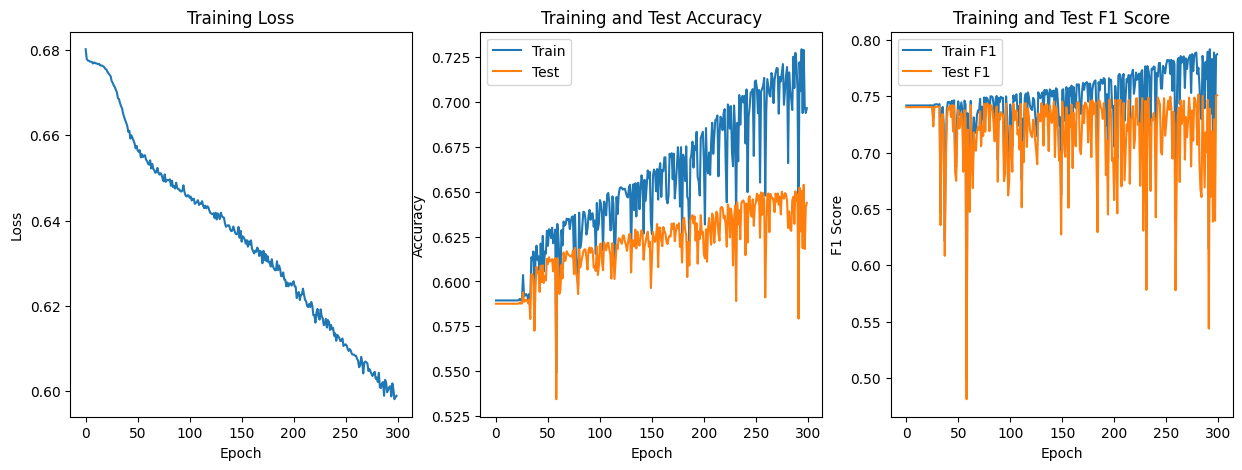

In [16]:
model = TransformerModel(input_dim, num_heads, ff_dim, num_transformer_blocks, mlp_units, mlp_dropout, dropout)
# Apply weight initialization
model.apply(init_weights)

loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_ica_val, test_loader_ica_val, 300, device)

In [17]:
model = TransformerModel(input_dim, num_heads, ff_dim, num_transformer_blocks, mlp_units, mlp_dropout, dropout)
# Apply weight initialization
model.apply(init_weights)

loss_epoch_array, train_accuracy_list, test_accuracy_list, f1_train, f1_test = train_net(model, train_loader_ica_dom, test_loader_ica_dom, 300, device)

Epoch 1: loss: 0.6683, train accuracy: 0.6202, train F1: 0.7656, valid accuracy: 0.6246, valid F1: 0.7689
Epoch 2: loss: 0.6648, train accuracy: 0.6202, train F1: 0.7656, valid accuracy: 0.6246, valid F1: 0.7689
Epoch 3: loss: 0.6647, train accuracy: 0.6202, train F1: 0.7656, valid accuracy: 0.6246, valid F1: 0.7689
Epoch 4: loss: 0.6643, train accuracy: 0.6202, train F1: 0.7656, valid accuracy: 0.6246, valid F1: 0.7689
Epoch 5: loss: 0.6643, train accuracy: 0.6202, train F1: 0.7656, valid accuracy: 0.6246, valid F1: 0.7689
Epoch 6: loss: 0.6641, train accuracy: 0.6202, train F1: 0.7656, valid accuracy: 0.6246, valid F1: 0.7689
Epoch 7: loss: 0.6640, train accuracy: 0.6202, train F1: 0.7656, valid accuracy: 0.6246, valid F1: 0.7689
Epoch 8: loss: 0.6640, train accuracy: 0.6202, train F1: 0.7656, valid accuracy: 0.6246, valid F1: 0.7689
Epoch 9: loss: 0.6638, train accuracy: 0.6202, train F1: 0.7656, valid accuracy: 0.6246, valid F1: 0.7689
Epoch 10: loss: 0.6638, train accuracy: 0.6202